In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import backus_utils as utils

In [12]:
path_to_coeffs = "../hlt_comparison/results/time_window/s11/1_32/Nt32/wmin_-0.1/alpha_0.1/out.avgc"
path_to_gen2l = "../gen-2l/32x32"

In [13]:
Nt = 32

t1 = 1
t2 = 32

wmin = -0.1
wmax = 1

channel = "sxx_i"

# Fetch Gen-2L correlator data

In [14]:
mean, std, cov = utils.get_sample(path_to_gen2l,channel,n_samples=-1,Nt=32,t1=1)
mean

array([3.02927516e+00, 2.08978915e+00, 1.47022468e+00, 1.04305115e+00,
       7.43093576e-01, 5.30825501e-01, 3.79676747e-01, 2.71918094e-01,
       1.94835304e-01, 1.39735851e-01, 1.00250391e-01, 7.19484264e-02,
       5.16500666e-02, 3.70832718e-02, 2.66337832e-02, 1.91337059e-02,
       1.37462046e-02, 9.87648257e-03, 7.09784416e-03, 5.10153963e-03,
       3.66697778e-03, 2.63611613e-03, 1.89514656e-03, 1.36255206e-03,
       9.79793655e-04, 7.04678838e-04, 5.06821713e-04, 3.64557645e-04,
       2.62392898e-04, 1.88849681e-04, 1.36014516e-04])

# Fetch coefficient data

In [15]:
coeffs = pd.read_csv(path_to_coeffs,header=None).values[:]
coeffs

array([[-2.16075593e+01,  2.92606043e+02, -1.18763309e+03, ...,
         3.09591333e+07, -3.54942473e+07,  1.05836784e+07],
       [-8.46207006e+00,  2.66594601e+01,  6.17778283e+01, ...,
        -1.21458933e+07,  1.39490145e+07, -4.16115828e+06],
       [-1.15458613e+01,  1.02097567e+02, -2.90319013e+02, ...,
         9.12669123e+05, -5.91838936e+05,  9.60260731e+04],
       ...,
       [-1.04704208e+01,  1.31700371e+01,  2.04305839e+02, ...,
        -9.30066165e+05,  1.01943340e+06, -2.90031338e+05],
       [-1.07652208e+01,  1.59285907e+01,  2.09831186e+02, ...,
        -9.13691485e+05,  1.01520244e+06, -2.90975418e+05],
       [-1.10787280e+01,  1.91923608e+01,  2.12740326e+02, ...,
        -8.92824535e+05,  1.00529885e+06, -2.90186145e+05]])

# Plot spectrum

Text(0.5, 0, '$\\omega$')

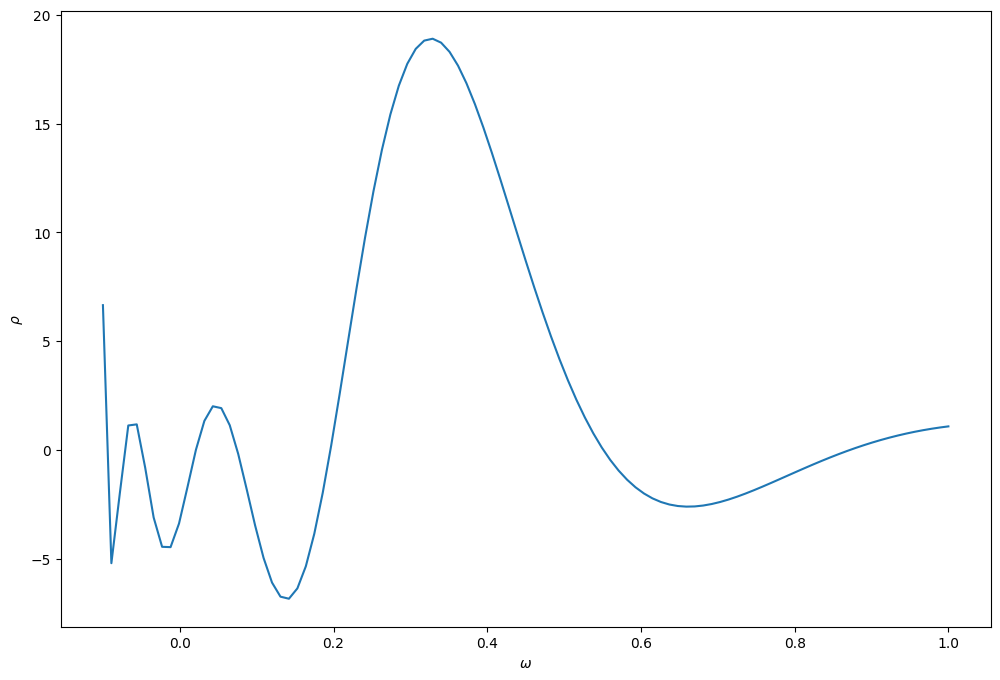

In [16]:
w = np.linspace(wmin,wmax,coeffs.shape[0])
rho = np.matmul(coeffs,mean)

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(w,rho)
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$\omega$")

# Plot averaging functions

In [17]:
t = np.arange(t1,t2)
A = np.matmul(coeffs,np.exp(-w*t.reshape(-1,1)))

Text(0.5, 1.0, '$\\omega_0=$0.01$a_\\tau^{-1}$')

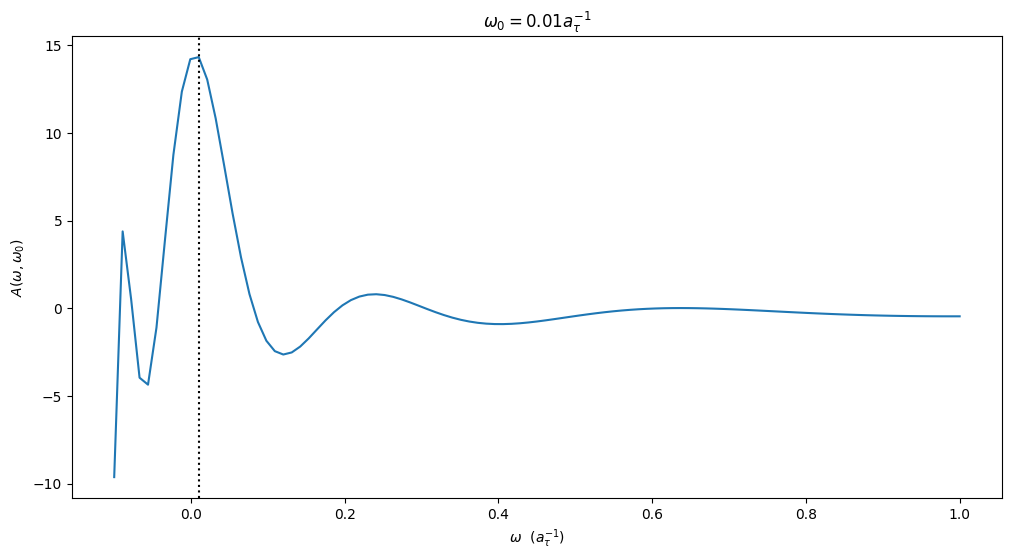

In [18]:
sample_point = 10

plt.figure(figsize=(12,6))
ax = plt.gca()

_ = ax.plot(w,A[sample_point])

ax.axvline(w[sample_point],ls=':',c='k')
ax.set_ylabel("$A(\omega,\omega_0)$")
ax.set_xlabel("$\omega~~(a_\\tau^{-1})$")
ax.set_title(f"$\omega_0=${w[sample_point]:.2f}$a_\\tau^{{-1}}$")

# Test correlator reconstruction

In [19]:
G_rec = []

for t_ in t:
    
    G_rec.append(np.trapz(rho * np.exp(-w*t_), w))

Text(0, 0.5, '$G(\\tau)$')

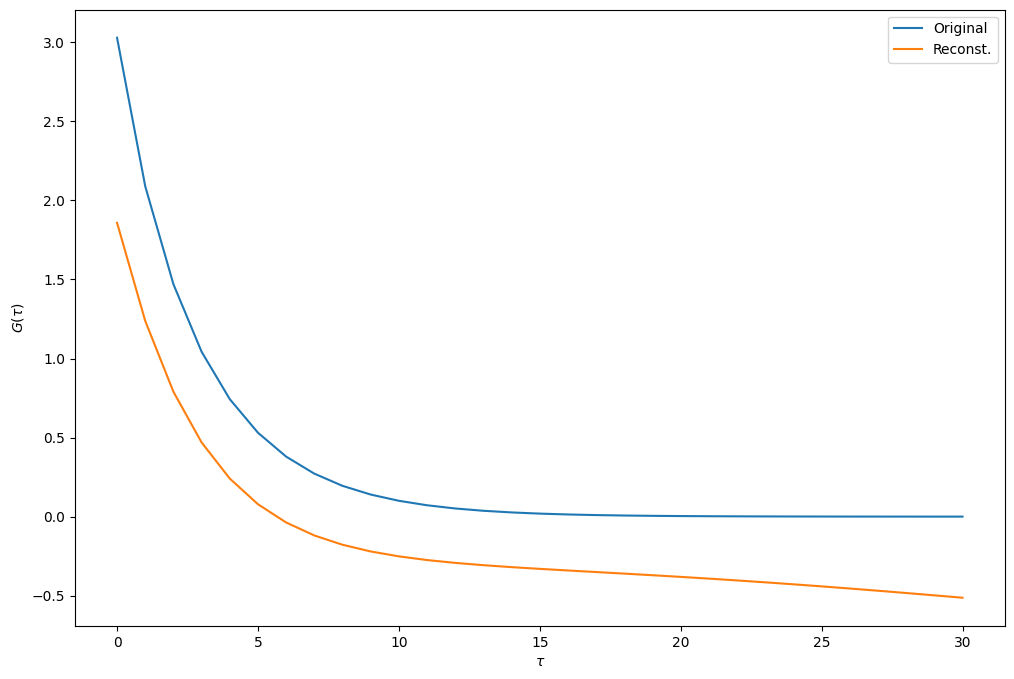

In [20]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(mean,label="Original")
ax.plot(G_rec,label="Reconst.")
ax.legend()

ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$G(\tau)$")

/tmp/ipykernel_784317/2919271557.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(-np.gradient(np.log(G_rec)),label="Reconst.")


Text(0, 0.5, '$G(\\tau)$')

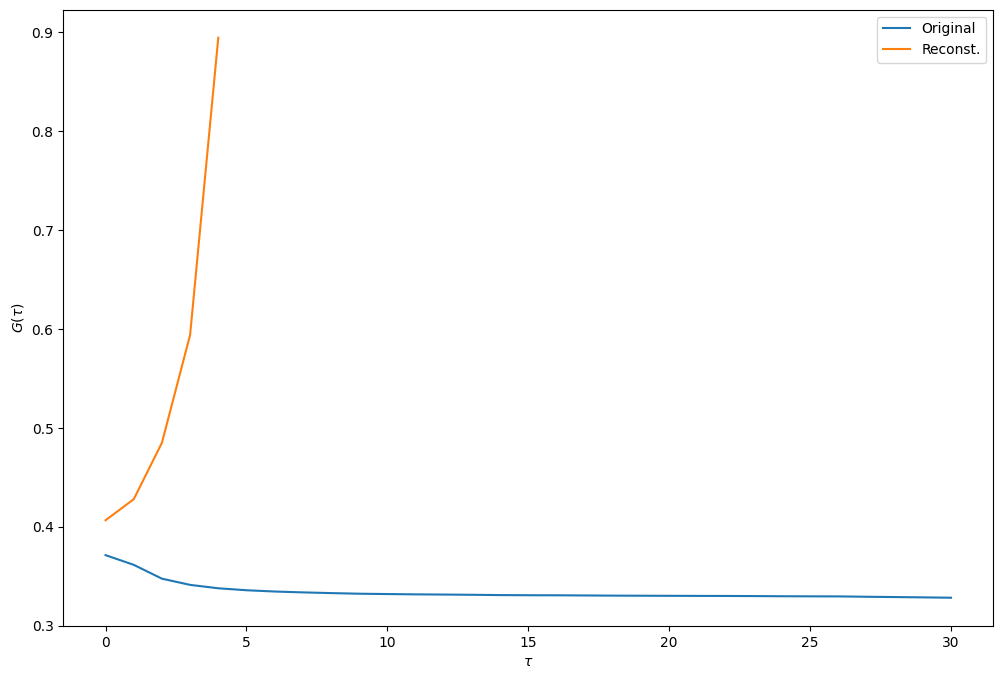

In [21]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(-np.gradient(np.log(mean)),label="Original")
ax.plot(-np.gradient(np.log(G_rec)),label="Reconst.")
ax.legend()

ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$G(\tau)$")